## Purpose:
The goal of this assignment is to use a synthetic dataset and generate a model that can identify features to assign points to specified groups with related features. The model should then be able to correctly predict samples with randomized features into their correct group. 

### Identify the optimal number of groups in the dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Load data file and print data head to check proper loading
df = pd.read_csv('Datasets/clustering_synthetic_dataset.csv')
df.head()

f1        f2
0  0.494261  1.451067
1 -1.428081 -0.837064
2  0.338559  1.038759
3  0.119001 -1.053976
4  1.122425  1.774937

In [2]:
# Renaming the columns to for clear category names
df.columns = ['Feature_1', 'Feature_2']
df.head()

Feature_1  Feature_2
0   0.494261   1.451067
1  -1.428081  -0.837064
2   0.338559   1.038759
3   0.119001  -1.053976
4   1.122425   1.774937

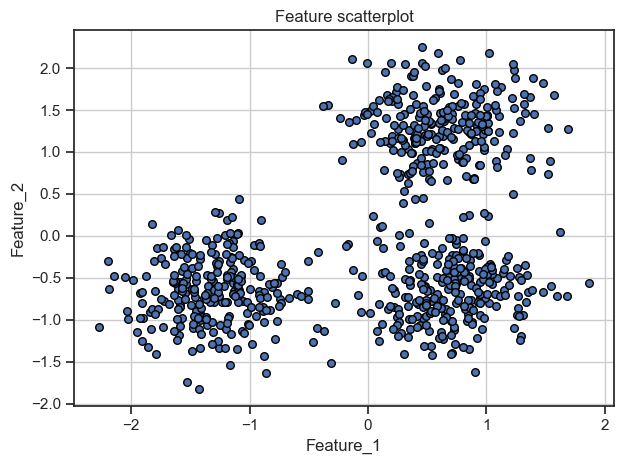

In [3]:
# Draw the scatter plot to visualize dataset
df.plot.scatter(x = 'Feature_1', y = 'Feature_2', title = 'Feature scatterplot', edgecolors = 'black',  s = 30); 
plt.grid()
plt.tight_layout()
plt.show()

Based on the scatterplot of the data, it appears that there are 3 species groups. 

### Identify feature ranges to classify groups 

The approximate ranges for the groupings are:
- Species 1
    - Feature 1 = [-2.5, -0.4]
    - Feature 2 = [-2.0, 0.5]
- Species 2
    - Feature 1 = [-0.4, 2]
    - Feature 2 = [-2.0, 0.5]
- Species 3
    - Feature 1 = [-0.4, 2]
    - Feature 2 = [0.5, 2.5]    

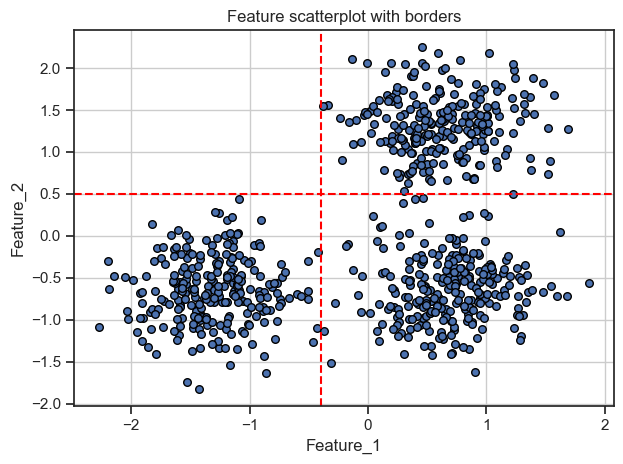

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# Draw the scatter plot 
ax = df.plot.scatter(x = 'Feature_1', y = 'Feature_2', title = 'Feature scatterplot with borders', 
                     edgecolors = 'black',  s = 30); 

# Draw approximate borders between species groups
ax.axhline(0.5, color="red", linestyle="--")
ax.axvline(-0.4, color="red", linestyle="--")

plt.grid()
plt.tight_layout()
plt.show()

### Use K-means clustering to identify anomalies

In [5]:
from sklearn.cluster import KMeans

# Generate Kmeans model to find 3 clusters
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df)

# Obtain and print the centroid locations
centroids = kmeans.cluster_centers_
print(centroids)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[ 0.6954587  -0.64442334]
 [-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]]


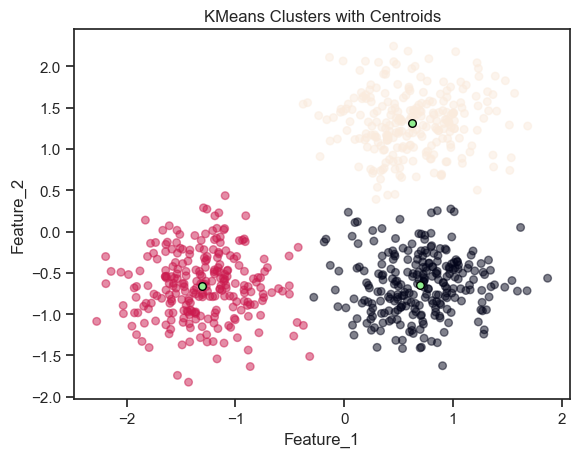

In [6]:
# Draw the scatter plot of clustered regions with their respective centroid
plt.scatter(df['Feature_1'], df['Feature_2'], c=kmeans.labels_.astype(float), s=30, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='lightgreen', edgecolors='black', s=30)

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title("KMeans Clusters with Centroids")

plt.show()

In [7]:
# Create sub-groups of clusters for later manipulation
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

centroid_zero = centroids[0]
centroid_one = centroids[1]
centroid_two = centroids[2]

df_clusterZero = df[kmeans.labels_ == 0]
array_clusterZero = df_clusterZero.loc[:, df_clusterZero.columns].values

df_clusterOne = df[kmeans.labels_ == 1]
array_clusterOne = df_clusterOne.loc[:, df_clusterOne.columns].values

df_clusterTwo = df[kmeans.labels_ == 2]
array_clusterTwo = df_clusterTwo.loc[:, df_clusterTwo.columns].values

In [8]:
# Sanity check for proper grouping
print(f'{df_clusterZero.head()}\n{df_clusterOne.head()}\n{df_clusterTwo.head()}')

    Feature_1  Feature_2
3    0.119001  -1.053976
7    0.585699  -0.339105
13   1.152634  -0.648540
19   0.436426  -1.065971
20   0.468034  -0.974110
    Feature_1  Feature_2
1   -1.428081  -0.837064
5   -1.261570   0.271881
6   -1.301548  -0.762062
10  -1.215782  -0.601021
11  -1.250218  -1.057617
   Feature_1  Feature_2
0   0.494261   1.451067
2   0.338559   1.038759
4   1.122425   1.774937
8   1.082472   0.886855
9   1.014167   1.341140


In [9]:
# Add centroid label to each cluster grouping
df_clusterZero = df_clusterZero.assign(centroid_distance = 
                                       lambda a: (np.sqrt((a['Feature_1']-centroid_zero[0])**2 +(a['Feature_2']-centroid_zero[1])**2)))


df_clusterOne = df_clusterOne.assign(centroid_distance = 
                                       lambda a: (np.sqrt((a['Feature_1']-centroid_one[0])**2 +(a['Feature_2']-centroid_one[1])**2)))


df_clusterTwo = df_clusterTwo.assign(centroid_distance = 
                                       lambda a: (np.sqrt((a['Feature_1']-centroid_two[0])**2 +(a['Feature_2']-centroid_two[1])**2)))


Feature_1   Feature_2  centroid_distance
count  250.000000  250.000000         250.000000
mean     0.695459   -0.644423           0.462651
std      0.369519    0.366553           0.236643
min     -0.278976   -1.624734           0.024517
25%      0.462250   -0.900657           0.280552
50%      0.710322   -0.649539           0.428536
75%      0.936171   -0.406314           0.614120
max      1.870438    0.273732           1.177677

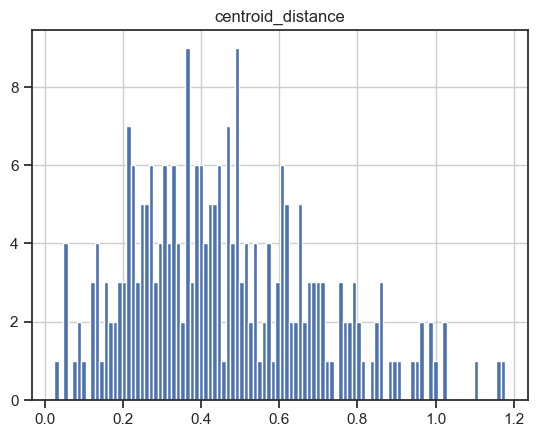

In [10]:
# Cluster zero histogram and details of data spread
df_clusterZero.hist(column = 'centroid_distance', bins = 100, grid=True)
df_clusterZero.describe()

Feature_1   Feature_2  centroid_distance
count  252.000000  252.000000         252.000000
mean    -1.302662   -0.657042           0.476349
std      0.364679    0.397550           0.251445
min     -2.274474   -1.823801           0.018119
25%     -1.548185   -0.938057           0.298010
50%     -1.300860   -0.665112           0.452017
75%     -1.086936   -0.407108           0.631711
max     -0.316450    0.435205           1.305332

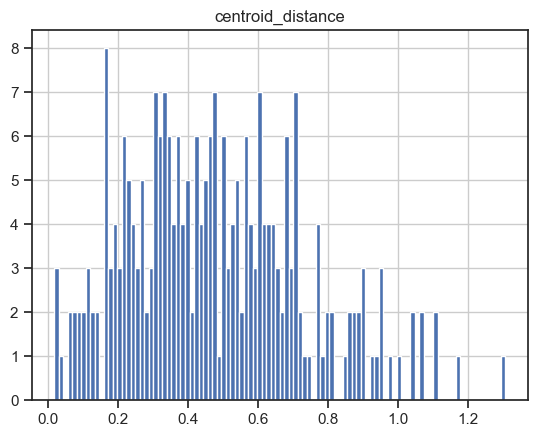

In [11]:
# Cluster one histogram and details of data spread
df_clusterOne.hist(column = 'centroid_distance', bins = 100, grid=True)
df_clusterOne.describe()

Feature_1   Feature_2  centroid_distance
count  248.000000  248.000000         248.000000
mean     0.622606    1.317260           0.478302
std      0.391943    0.370696           0.247661
min     -0.376722    0.389904           0.036016
25%      0.359299    1.082727           0.294453
50%      0.596848    1.329465           0.441737
75%      0.914272    1.549891           0.648341
max      1.687451    2.245794           1.096469

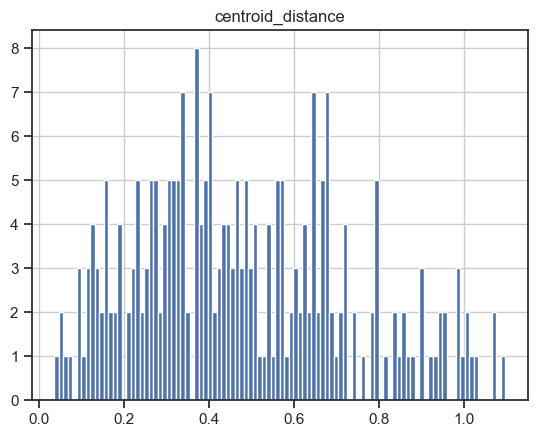

In [12]:
# Cluster two histogram and details of data spread
df_clusterTwo.hist(column = 'centroid_distance', bins = 100, grid=True)
df_clusterTwo.describe()

In [13]:
# Arbitrarily picked inlier/outlier cutoffs for Kmeans datasets
ingroup_clusterZero = df_clusterZero.loc[(df_clusterZero["centroid_distance"] <= 1)]
outgroup_clusterZero = df_clusterZero.loc[(df_clusterZero["centroid_distance"] > 1)]

ingroup_clusterOne = df_clusterOne.loc[(df_clusterOne["centroid_distance"] <= 1)]
outgroup_clusterOne = df_clusterOne.loc[(df_clusterOne["centroid_distance"] > 1)]

ingroup_clusterTwo = df_clusterTwo.loc[(df_clusterTwo["centroid_distance"] <= 1)]
outgroup_clusterTwo = df_clusterTwo.loc[(df_clusterTwo["centroid_distance"] > 1)]

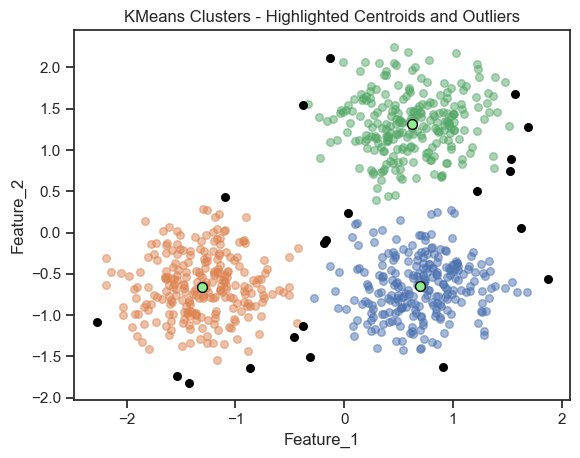

In [14]:
# Draw the scatter plot with highlighted outliers for each cluster
plt.scatter(ingroup_clusterZero['Feature_1'], ingroup_clusterZero['Feature_2'], s=30, alpha=0.5)
plt.scatter(outgroup_clusterZero['Feature_1'], outgroup_clusterZero['Feature_2'], s=30, color='black', alpha=1)

plt.scatter(ingroup_clusterOne['Feature_1'], ingroup_clusterOne['Feature_2'], s=30, alpha=0.5)
plt.scatter(outgroup_clusterOne['Feature_1'], outgroup_clusterOne['Feature_2'], s=30, color='black', alpha=1)

plt.scatter(ingroup_clusterTwo['Feature_1'], ingroup_clusterTwo['Feature_2'], s=30, alpha=0.5)
plt.scatter(outgroup_clusterTwo['Feature_1'], outgroup_clusterTwo['Feature_2'], s=30, color='black', alpha=1)

plt.scatter(centroids[:, 0], centroids[:, 1], c='lightgreen', edgecolors='black', s=50)

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title("KMeans Clusters - Highlighted Centroids and Outliers")

plt.show()

In [15]:
# Print outliers from KMeans
print(f'{outgroup_clusterZero}\n{outgroup_clusterOne}\n{outgroup_clusterTwo}')

     Feature_1  Feature_2  centroid_distance
39   -0.166999  -0.091653           1.024397
273   1.621982   0.050201           1.157994
282  -0.183578  -0.125434           1.020811
337   0.904913  -1.624734           1.002437
663   1.870438  -0.564764           1.177677
723   0.038270   0.234517           1.097467
     Feature_1  Feature_2  centroid_distance
16   -1.430208  -1.823801           1.173709
135  -1.531992  -1.741468           1.108410
165  -0.463075  -1.265318           1.036777
461  -0.316450  -1.512189           1.305332
531  -2.274474  -1.087520           1.062888
570  -1.093526   0.435205           1.112088
657  -0.863388  -1.634318           1.071462
684  -0.374479  -1.136242           1.044584
     Feature_1  Feature_2  centroid_distance
76   -0.134479   2.110397           1.096469
95    1.224255   0.501611           1.013541
108   1.536241   0.894605           1.006661
110   1.687451   1.278308           1.065558
149   1.523074   0.741158           1.068989
343  -0.37

### Alternative method of finding anomalies using DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

# DBSCAN model
db = DBSCAN(eps=0.2, 
            min_samples=5, 
            metric='euclidean')
db_clusters = db.fit(df)

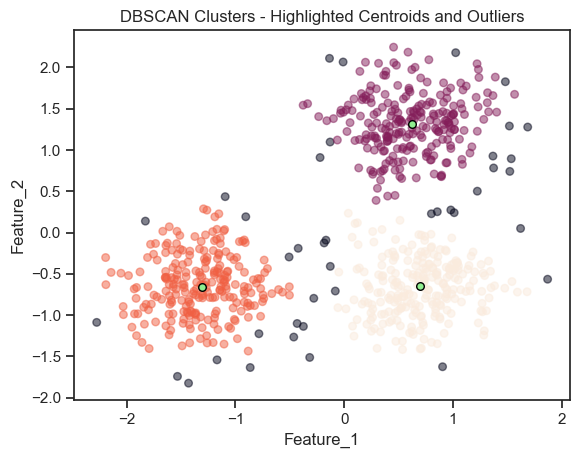

In [17]:
# Draw the DBSCAN-generated scatter plot with marked outliers and centroids
plt.scatter(df['Feature_1'], df['Feature_2'], c=db_clusters.labels_, s=30, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='lightgreen', edgecolors='black', s=30)

plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title("DBSCAN Clusters - Highlighted Centroids and Outliers")

plt.show()

### Develop a decision tree classifier to model the species 

In [18]:
# Generate a deep copy of the pre-processed data and check that it was properly copied
df_copy = df.copy(deep=True)
df_copy.head()

Feature_1  Feature_2
0   0.494261   1.451067
1  -1.428081  -0.837064
2   0.338559   1.038759
3   0.119001  -1.053976
4   1.122425   1.774937

In [19]:
# Insert 'cluster' column obtained from DBSCAN to the original dataset and perform a sanity check 
df_copy.insert(2, "cluster", db_clusters.labels_, True)
print(df_copy.iloc[:15])

    Feature_1  Feature_2  cluster
0    0.494261   1.451067        0
1   -1.428081  -0.837064        1
2    0.338559   1.038759        0
3    0.119001  -1.053976        2
4    1.122425   1.774937        0
5   -1.261570   0.271881        1
6   -1.301548  -0.762062        1
7    0.585699  -0.339105        2
8    1.082472   0.886855        0
9    1.014167   1.341140        0
10  -1.215782  -0.601021        1
11  -1.250218  -1.057617        1
12  -1.051604  -0.780084        1
13   1.152634  -0.648540        2
14  -0.783299  -1.224897       -1


In [20]:
# Create a dataset with DBSCAN outliers removed and perform a sanity check 
clean_df = df_copy.loc[(df_copy["cluster"] != -1)]

print(clean_df.iloc[:15])

    Feature_1  Feature_2  cluster
0    0.494261   1.451067        0
1   -1.428081  -0.837064        1
2    0.338559   1.038759        0
3    0.119001  -1.053976        2
4    1.122425   1.774937        0
5   -1.261570   0.271881        1
6   -1.301548  -0.762062        1
7    0.585699  -0.339105        2
8    1.082472   0.886855        0
9    1.014167   1.341140        0
10  -1.215782  -0.601021        1
11  -1.250218  -1.057617        1
12  -1.051604  -0.780084        1
13   1.152634  -0.648540        2
15   0.202587   1.611048        0


In [21]:
# Prepare the input X matrix and target y vector
# The two datasets will be (1) the original dataset
# and (2) the DBSCAN dataset that has outliers removed
X_original = df_copy.loc[:, df_copy.columns != 'cluster'].values
y_original = df_copy.loc[ :, df_copy.columns == 'cluster'].values.ravel()

X_db_clean = clean_df.loc[:, clean_df.columns != 'cluster'].values
y_db_clean = clean_df.loc[ :, clean_df.columns == 'cluster'].values.ravel()

In [22]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Model the DBSCAN clusters and print out the decision tree classifier steps 
clf_dbscan_clean = DecisionTreeClassifier(random_state=1234)
model_dbscan_clean = clf_dbscan_clean.fit(X_db_clean, y_db_clean)
text_representation = tree.export_text(clf_dbscan_clean)
print(text_representation)

|--- feature_0 <= -0.44
|   |--- class: 1
|--- feature_0 >  -0.44
|   |--- feature_1 <= 0.31
|   |   |--- class: 2
|   |--- feature_1 >  0.31
|   |   |--- class: 0



[Text(0.4, 0.8333333333333334, 'Feature_1 <= -0.44\ngini = 0.667\nsamples = 710\nvalue = [235, 237, 238]\nclass = Group 2'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 237\nvalue = [0, 237, 0]\nclass = Group 1'),
 Text(0.6, 0.5, 'Feature_2 <= 0.312\ngini = 0.5\nsamples = 473\nvalue = [235, 0, 238]\nclass = Group 2'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 238\nvalue = [0, 0, 238]\nclass = Group 2'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 235\nvalue = [235, 0, 0]\nclass = Group 0')]

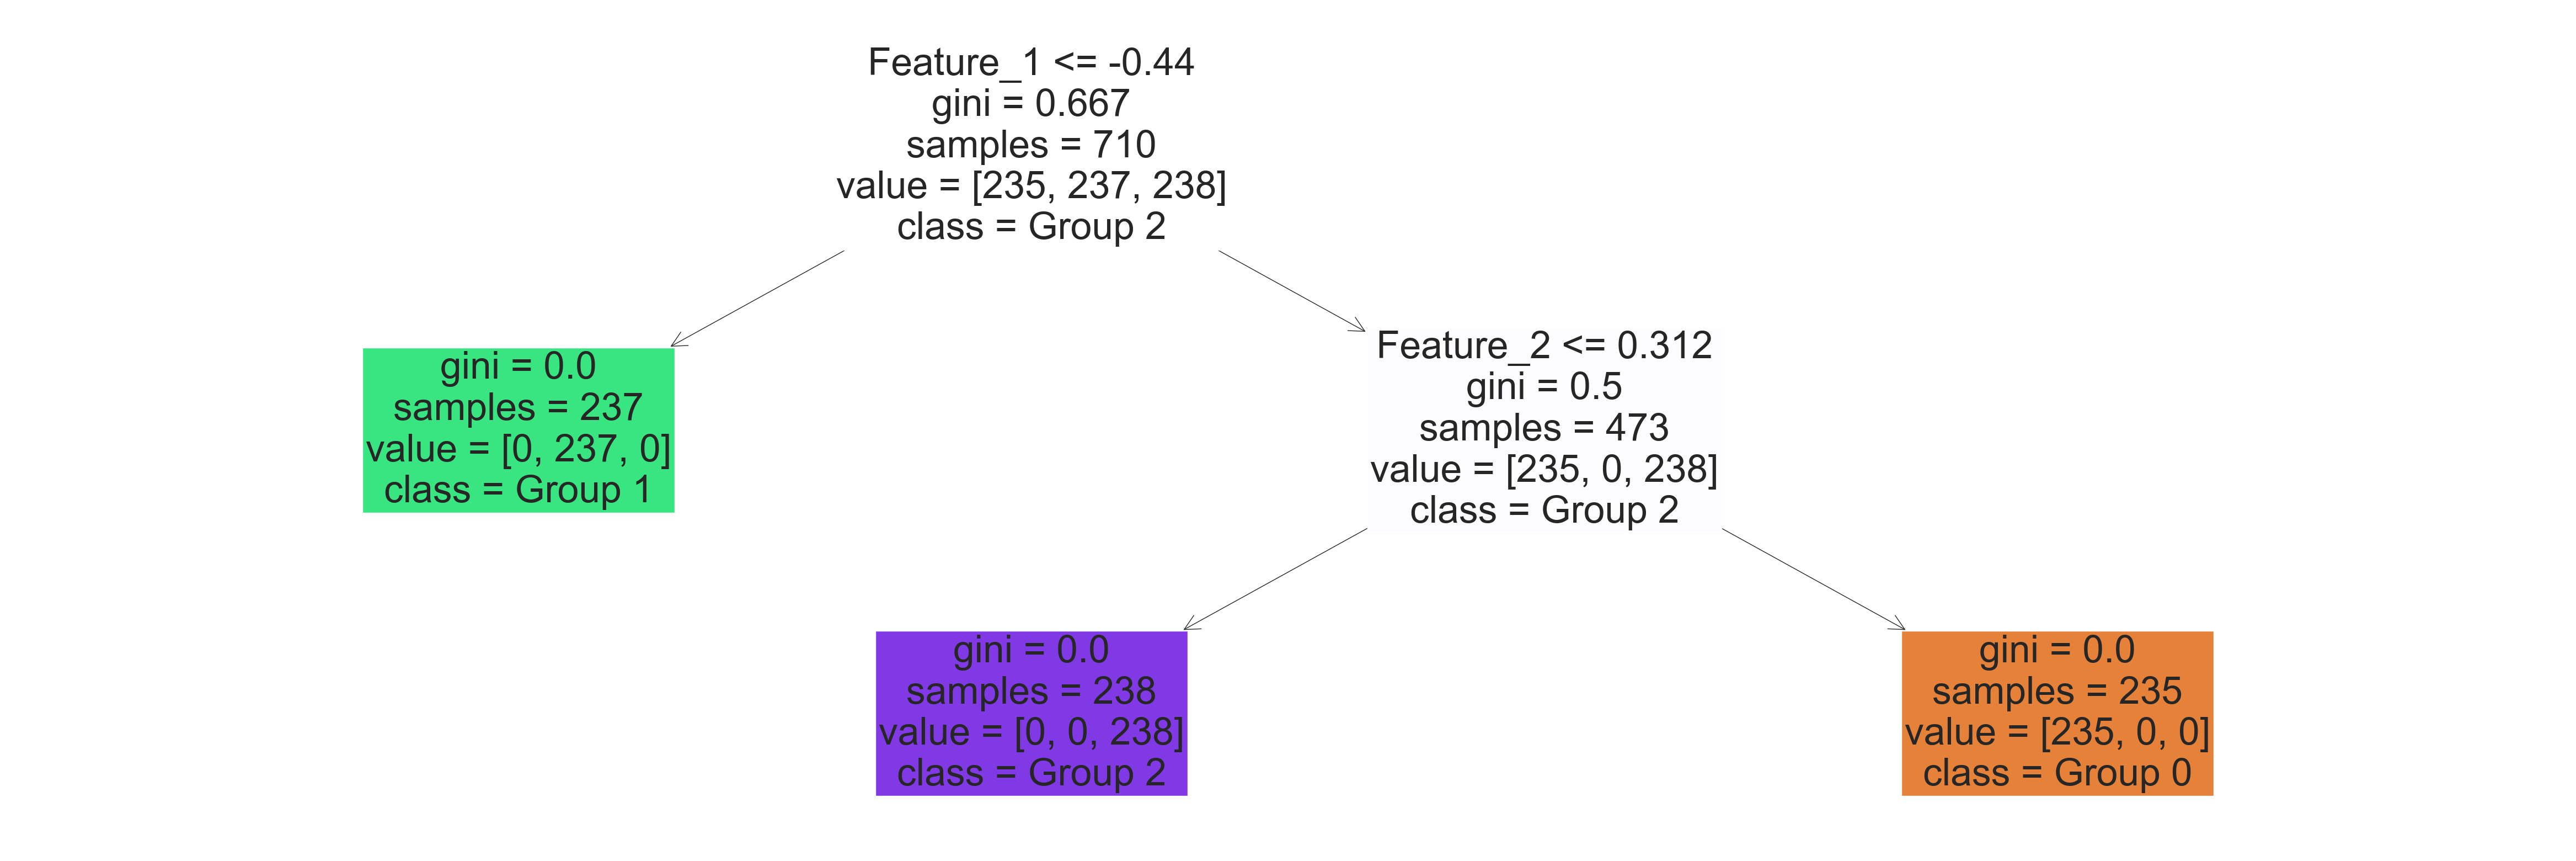

In [23]:
# Generate a visualized model of the decision tree classifier 
fig = plt.figure(figsize=(60,20))
class_names = ['Group 0', 'Group 1', 'Group 2']
feature_names = ['Feature_1', 'Feature_2']
tree.plot_tree(clf_dbscan_clean, fontsize=50, class_names = class_names, feature_names = feature_names, filled=True)

In [24]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Model the DBSCAN clusters containing outliers 
clf_dbscan_original = DecisionTreeClassifier(random_state=1234)
model_dbscan_original = clf_dbscan_original.fit(X_original, y_original)
text_representation = tree.export_text(clf_dbscan_original)
print(text_representation)

|--- feature_0 <= -0.48
|   |--- feature_1 <= -1.49
|   |   |--- class: -1
|   |--- feature_1 >  -1.49
|   |   |--- feature_1 <= 0.10
|   |   |   |--- feature_0 <= -2.23
|   |   |   |   |--- class: -1
|   |   |   |--- feature_0 >  -2.23
|   |   |   |   |--- feature_0 <= -0.54
|   |   |   |   |   |--- feature_0 <= -0.79
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -0.79
|   |   |   |   |   |   |--- feature_1 <= -1.12
|   |   |   |   |   |   |   |--- class: -1
|   |   |   |   |   |   |--- feature_1 >  -1.12
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.54
|   |   |   |   |   |--- feature_1 <= -0.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -0.48
|   |   |   |   |   |   |--- class: -1
|   |   |--- feature_1 >  0.10
|   |   |   |--- feature_0 <= -1.12
|   |   |   |   |--- feature_1 <= 0.17
|   |   |   |   |   |--- class: -1
|   |   |   |   |--- feature_1 >  0.17
|   |   |   |   |   |--- class:

[Text(0.3871527777777778, 0.9375, 'Feature_1 <= -0.483\ngini = 0.698\nsamples = 750\nvalue = [40, 235, 237, 238]\nclass = Group 2'),
 Text(0.1527777777777778, 0.8125, 'Feature_2 <= -1.488\ngini = 0.078\nsamples = 247\nvalue = [10, 0, 237, 0]\nclass = Group 1'),
 Text(0.125, 0.6875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]\nclass = Outlier'),
 Text(0.18055555555555555, 0.6875, 'Feature_2 <= 0.105\ngini = 0.048\nsamples = 243\nvalue = [6, 0, 237, 0]\nclass = Group 1'),
 Text(0.08333333333333333, 0.5625, 'Feature_1 <= -2.233\ngini = 0.025\nsamples = 236\nvalue = [3, 0, 233, 0]\nclass = Group 1'),
 Text(0.05555555555555555, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Outlier'),
 Text(0.1111111111111111, 0.4375, 'Feature_1 <= -0.536\ngini = 0.017\nsamples = 235\nvalue = [2, 0, 233, 0]\nclass = Group 1'),
 Text(0.05555555555555555, 0.3125, 'Feature_1 <= -0.787\ngini = 0.009\nsamples = 232\nvalue = [1, 0, 231, 0]\nclass = Group 1'),
 Text(0.027777777777777776, 0.1875

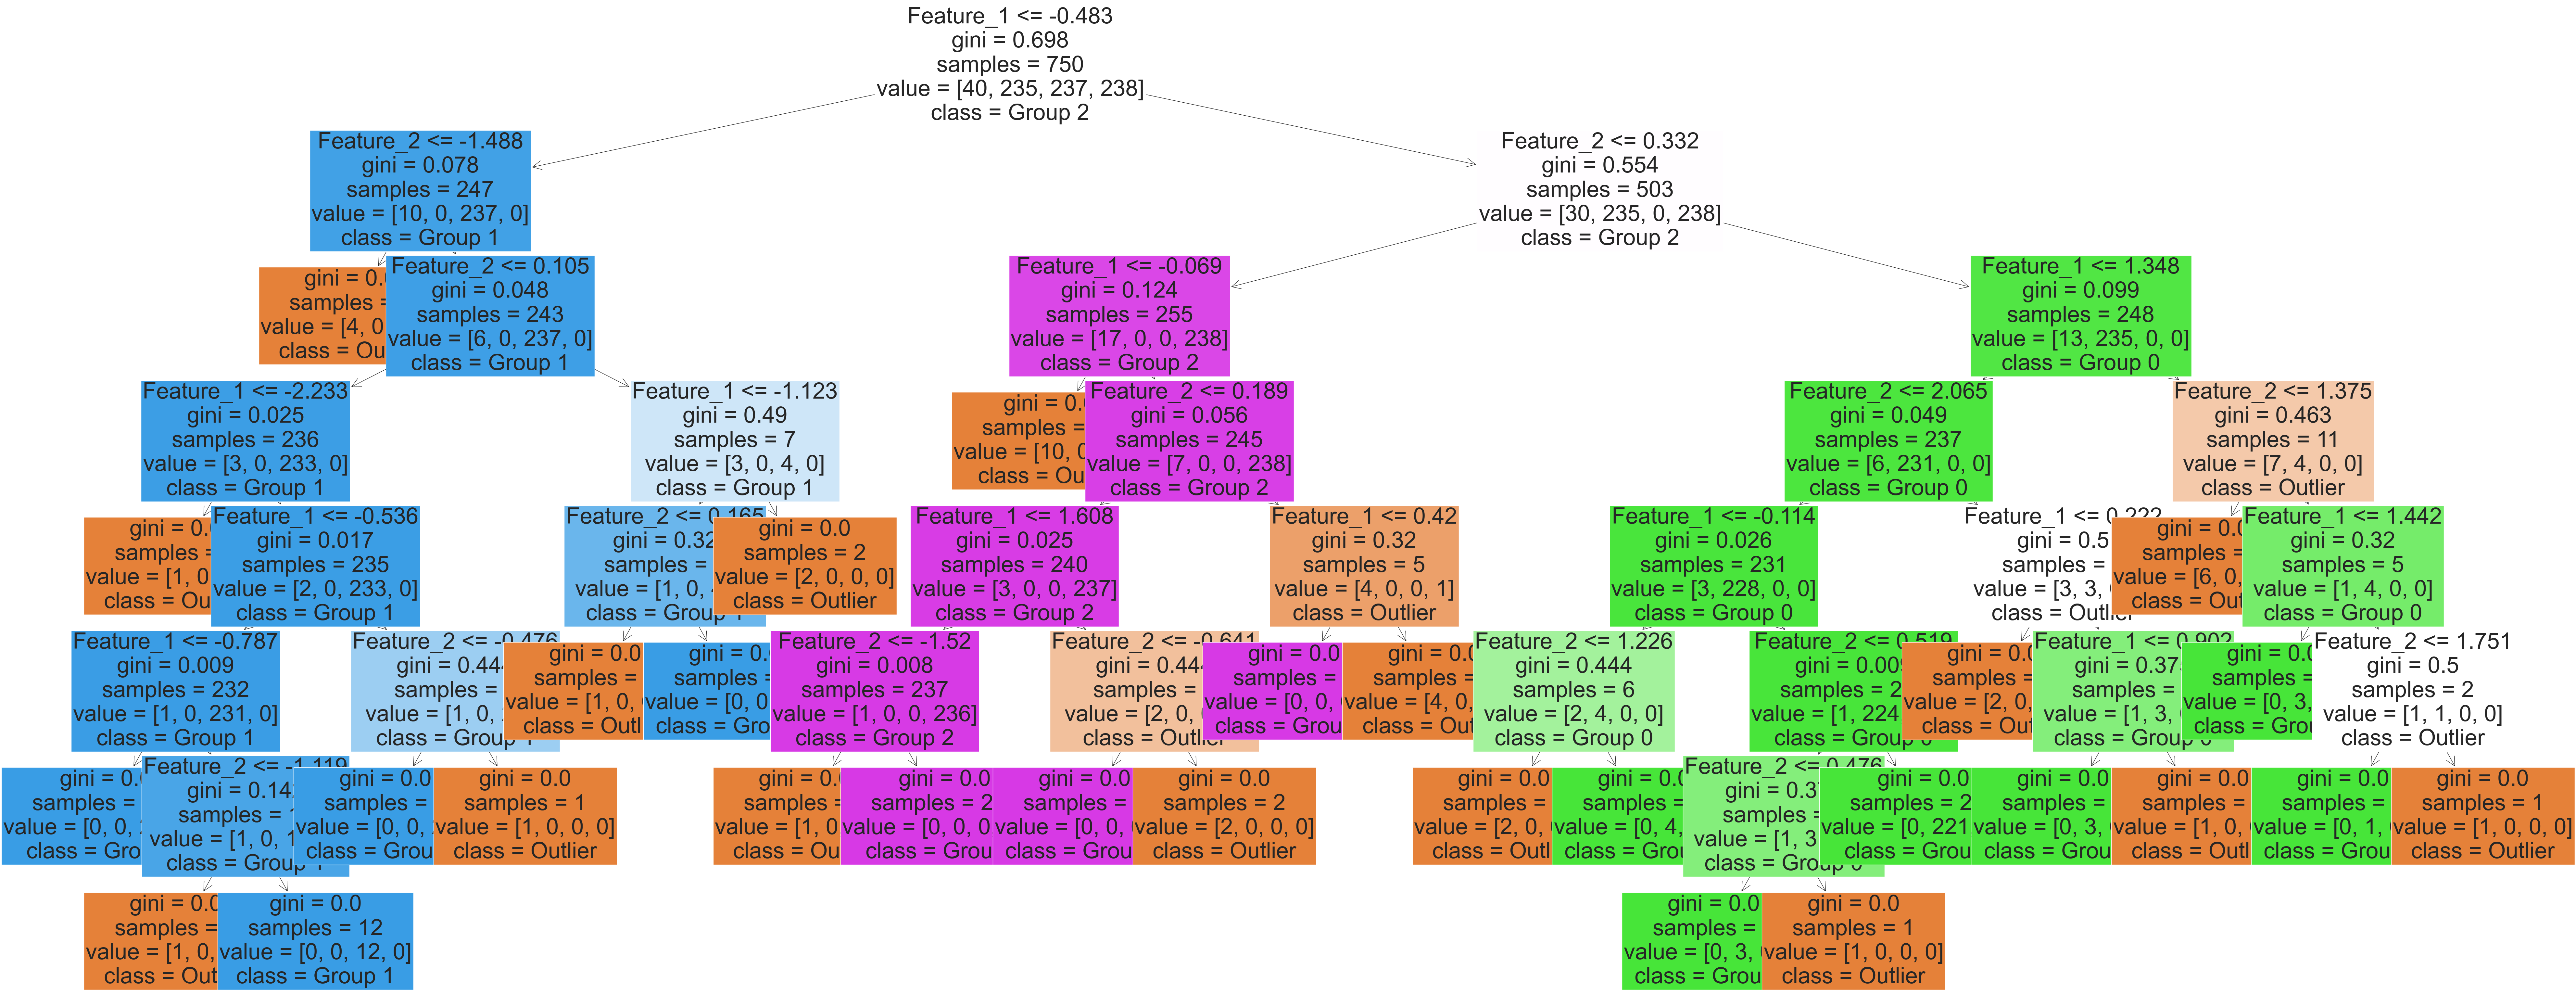

In [25]:
# Generate a visualized model of the decision tree classifier 
fig = plt.figure(figsize=(100,40))
class_names = ['Outlier', 'Group 0', 'Group 1', 'Group 2']
feature_names = ['Feature_1', 'Feature_2']
tree.plot_tree(clf_dbscan_original, fontsize=50, class_names = class_names, feature_names = feature_names, filled=True)

### Note
Above are the visualized decision tree classifiers using the DBSCAN groupings with outliers and without outliers. The decision tree without outliers has a depth = 2 while the decision tree containing outliers has depth = 7. Although this is not exactly a 1:1 comparison with DBSCAN marking outliers without an original group, does help visualize the extra steps required for identifying outliers in a dataset. Even with only hypothesized clusters in the dataset, the depth of the decision tree more than tripled. I will look further into the KMeans decision tree as the outliers are not categorized into a separate grouping. 

### Identify if the cleaned dataset improves the decision tree results

### KMeans - Comparison of decision tree model classifier

In [26]:
# Generate the cluster groupings for Kmeans dataset with outliers removed
ingroup_clusterZero.insert(2, "cluster", 0, True)
ingroup_clusterOne.insert(2, "cluster", 1, True)
ingroup_clusterTwo.insert(2, "cluster", 2, True)

clean_KMeans = pd.concat([ingroup_clusterZero, ingroup_clusterOne, ingroup_clusterTwo])
clean_KMeans = clean_KMeans.drop(columns = ['centroid_distance'])
print(clean_KMeans)

     Feature_1  Feature_2  cluster
3     0.119001  -1.053976        0
7     0.585699  -0.339105        0
13    1.152634  -0.648540        0
19    0.436426  -1.065971        0
20    0.468034  -0.974110        0
..         ...        ...      ...
734   0.800860   0.881746        2
736   0.403732   1.165925        2
737   0.633083   0.852550        2
739   0.368551   0.768785        2
745   0.505927   1.213927        2

[729 rows x 3 columns]


In [27]:
# Generate a singular dataset containing the KMeans clusters without outliers
df_clusterZero.insert(2, "cluster", 0, True)
df_clusterOne.insert(2, "cluster", 1, True)
df_clusterTwo.insert(2, "cluster", 2, True)

original_KMeans = pd.concat([df_clusterZero, df_clusterOne, df_clusterTwo ])
original_KMeans = original_KMeans.drop(columns = ['centroid_distance'])
print(original_KMeans)

     Feature_1  Feature_2  cluster
3     0.119001  -1.053976        0
7     0.585699  -0.339105        0
13    1.152634  -0.648540        0
19    0.436426  -1.065971        0
20    0.468034  -0.974110        0
..         ...        ...      ...
734   0.800860   0.881746        2
736   0.403732   1.165925        2
737   0.633083   0.852550        2
739   0.368551   0.768785        2
745   0.505927   1.213927        2

[750 rows x 3 columns]


In [28]:
# Prepare the input X matrix and target y vector
# The two datasets will be (1) the original dataset with Kmeans labels
# and (2) the Kmeans dataset that has outliers removed

X_Kmeans_original = original_KMeans.loc[:, original_KMeans.columns != 'cluster'].values
y_Kmeans_original = original_KMeans.loc[ :, original_KMeans.columns == 'cluster'].values.ravel()

X_Kmeans_clean = clean_KMeans.loc[:, clean_KMeans.columns != 'cluster'].values
y_Kmeans_clean = clean_KMeans.loc[ :, clean_KMeans.columns == 'cluster'].values.ravel()

In [29]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Model the DBSCAN clusters and print out the decision tree classifier steps 
clf_kmeans_clean = DecisionTreeClassifier(random_state=1234)
model = clf_kmeans_clean.fit(X_Kmeans_clean, y_Kmeans_clean)
text_representation = tree.export_text(clf_kmeans_clean)
print(text_representation)

|--- feature_0 <= -0.38
|   |--- class: 1
|--- feature_0 >  -0.38
|   |--- feature_1 <= 0.33
|   |   |--- class: 0
|   |--- feature_1 >  0.33
|   |   |--- class: 2



[Text(0.4, 0.8333333333333334, 'Feature_1 <= -0.379\ngini = 0.667\nsamples = 729\nvalue = [244, 244, 241]\nclass = Group 0'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 244\nvalue = [0, 244, 0]\nclass = Group 1'),
 Text(0.6, 0.5, 'Feature_2 <= 0.332\ngini = 0.5\nsamples = 485\nvalue = [244, 0, 241]\nclass = Group 0'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 244\nvalue = [244, 0, 0]\nclass = Group 0'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 241\nvalue = [0, 0, 241]\nclass = Group 2')]

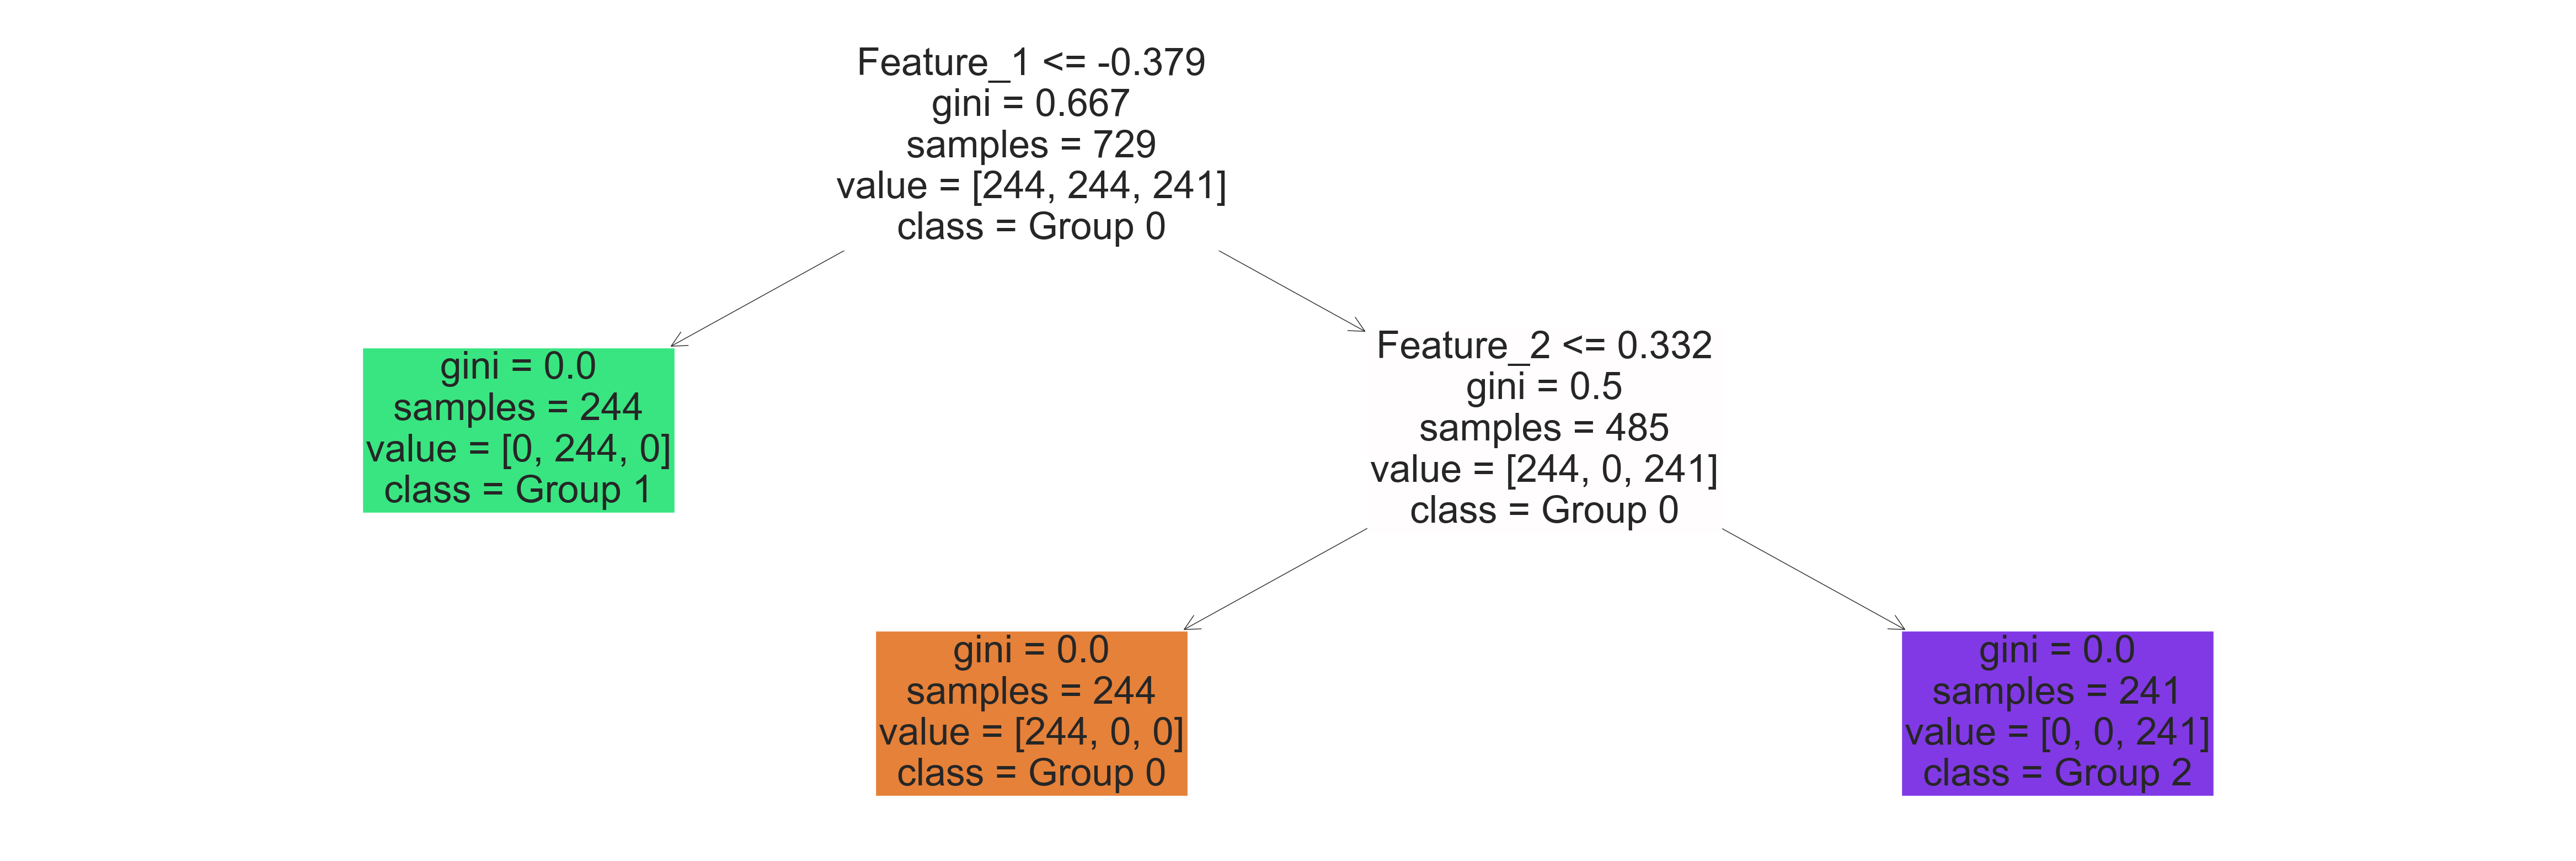

In [30]:
# Generate a visualized model of the decision tree classifier 
fig = plt.figure(figsize=(60,20))
class_names = ['Group 0', 'Group 1', 'Group 2']
feature_names = ['Feature_1', 'Feature_2']
tree.plot_tree(clf_kmeans_clean, fontsize=50, feature_names=feature_names, class_names=class_names, filled=True)

In [31]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Model the DBSCAN clusters and print out the decision tree classifier steps 
clf_kmeans_original = DecisionTreeClassifier(random_state=1234)
model = clf_kmeans_original.fit(X_Kmeans_original, y_Kmeans_original)
text_representation = tree.export_text(clf_kmeans_original)
print(text_representation)

|--- feature_0 <= -0.30
|   |--- feature_1 <= 0.99
|   |   |--- class: 1
|   |--- feature_1 >  0.99
|   |   |--- class: 2
|--- feature_0 >  -0.30
|   |--- feature_1 <= 0.33
|   |   |--- class: 0
|   |--- feature_1 >  0.33
|   |   |--- class: 2



[Text(0.5, 0.8333333333333334, 'Feature_1 <= -0.298\ngini = 0.667\nsamples = 750\nvalue = [250, 252, 248]\nclass = Group 1'),
 Text(0.25, 0.5, 'Feature_2 <= 0.989\ngini = 0.016\nsamples = 254\nvalue = [0, 252, 2]\nclass = Group 1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 252\nvalue = [0, 252, 0]\nclass = Group 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Group 2'),
 Text(0.75, 0.5, 'Feature_2 <= 0.332\ngini = 0.5\nsamples = 496\nvalue = [250, 0, 246]\nclass = Group 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 250\nvalue = [250, 0, 0]\nclass = Group 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246]\nclass = Group 2')]

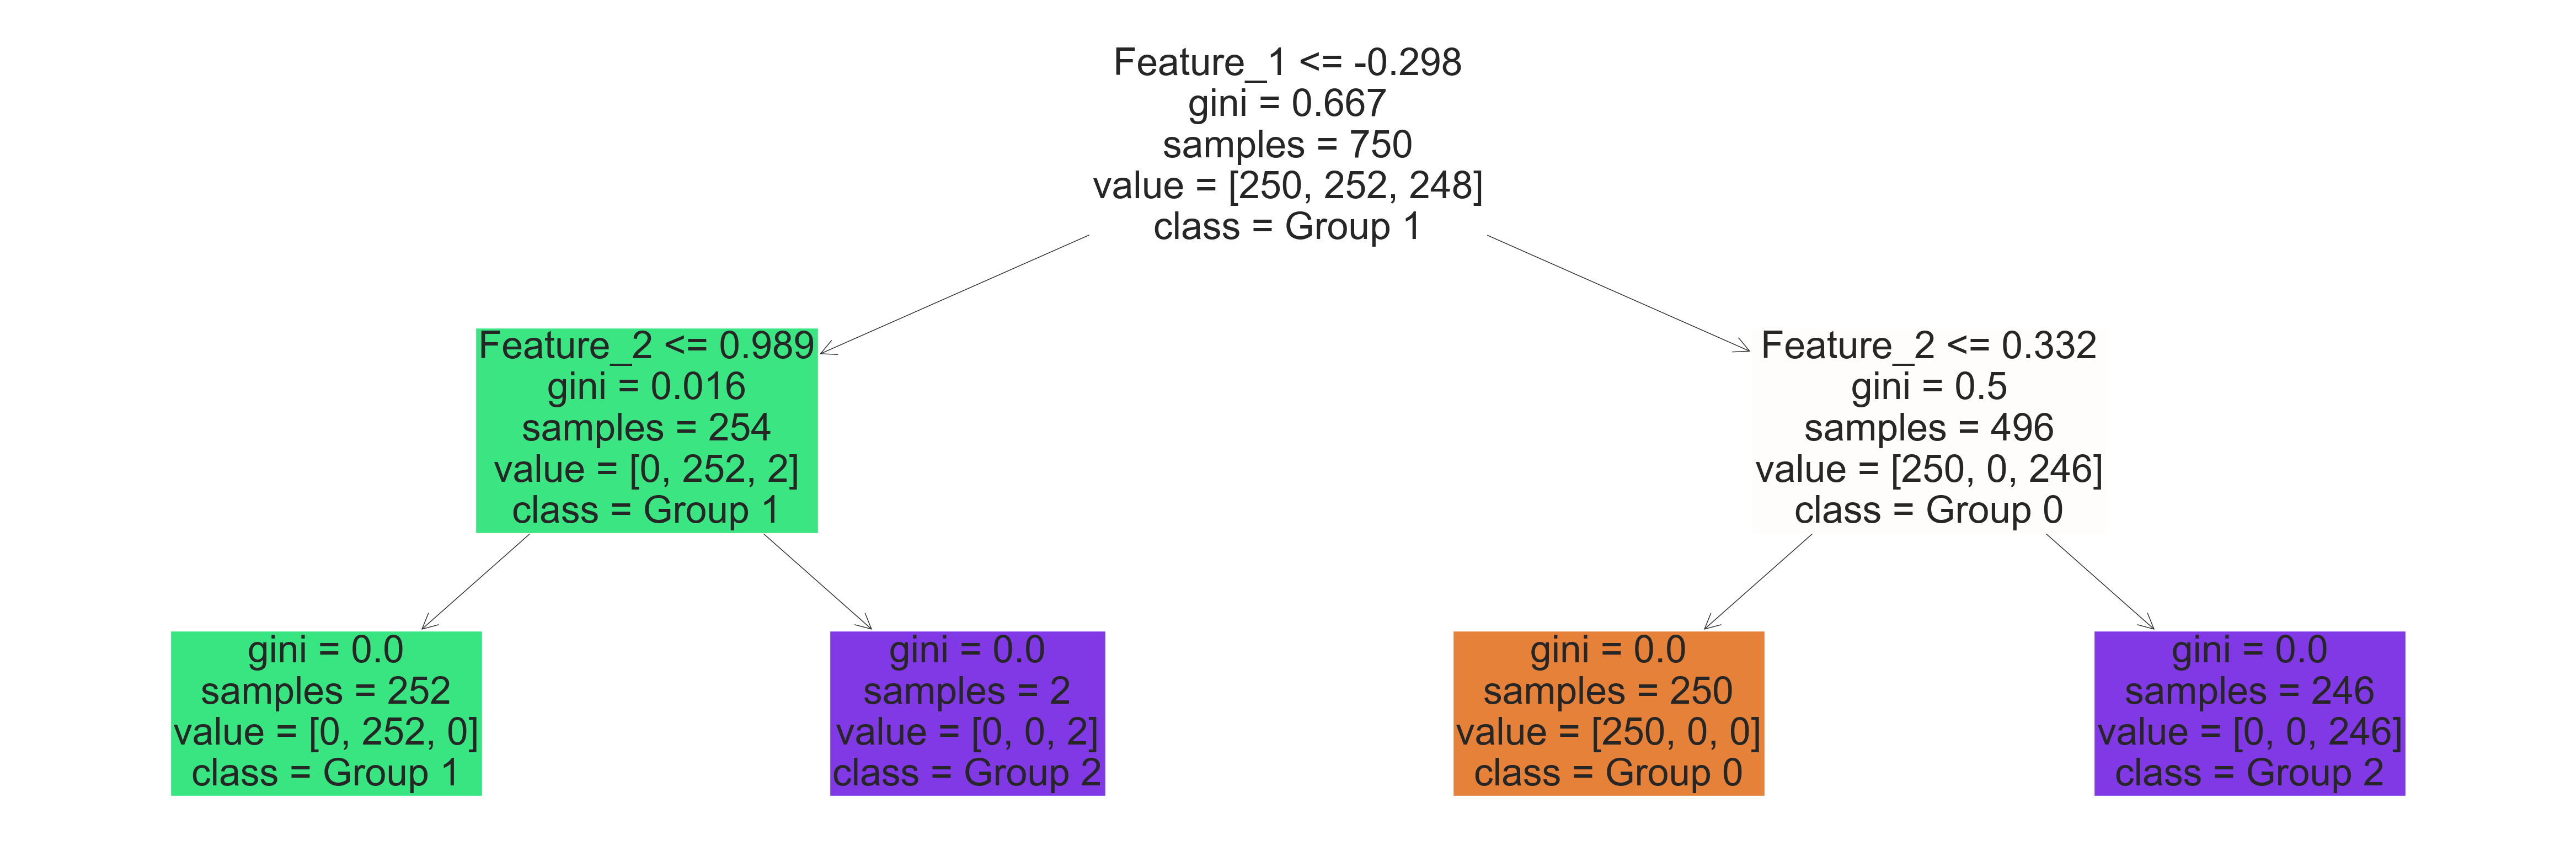

In [32]:
# Generate a visualized model of the decision tree classifier 
fig = plt.figure(figsize=(60,20))
class_names = ['Group 0', 'Group 1', 'Group 2']
feature_names = ['Feature_1', 'Feature_2']
tree.plot_tree(clf_kmeans_original, fontsize=50, feature_names=feature_names, class_names=class_names, filled=True)

### Note
In the above example, we can visualize the differences between the KMeans decision trees with and without outliers. Both decision trees have depth = 2, but the tree containing outliers is a complete binary tree where each parent node has two child nodes. Removing the outliers did remove one extra decision node step that contained overlap in the hypothesized groups.

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# 10-fold CV evaluation of a classifier
def eval_classifier(_clf, _X, _y):
    accuracies = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        accuracies += [accuracy_score(_y[test_index], y_pred)]
    return np.array(accuracies)

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Evaluate the accuracy of cluster predictions with the Kmeans original data
acc = eval_classifier(DecisionTreeClassifier(),
                      X_Kmeans_original, y_Kmeans_original)
print(f'Kmeans - Original data - Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Kmeans - Original data - Decision Tree CV accuracy=0.99 ±0.011


In [35]:
from sklearn.tree import DecisionTreeClassifier

# Evaluate the accuracy of cluster predictions with the Kmeans data with outliers removed
acc = eval_classifier(DecisionTreeClassifier(),
                      X_Kmeans_clean, y_Kmeans_clean)
print(f'Kmeans - Cleaned data - Decision Tree CV accuracy={np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}')

Kmeans - Cleaned data - Decision Tree CV accuracy=1.00 ±0.000


<Axes: xlabel='cluster', ylabel='Feature_2'>

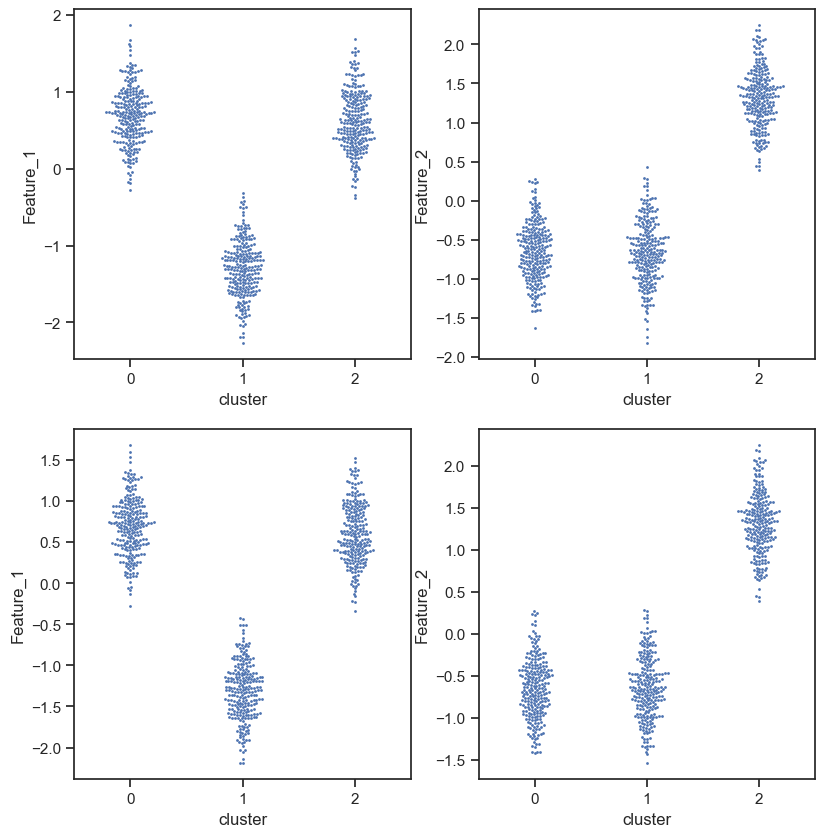

In [36]:
plt.figure(figsize=(20, 10), dpi=100)

# Plot each feature versus categories
plt.subplot(2, 4, 1)
sns.swarmplot(x=original_KMeans["cluster"], y=original_KMeans["Feature_1"], size=2)

# Plot each feature versus categories
plt.subplot(2, 4, 2)
sns.swarmplot(x=original_KMeans["cluster"], y=original_KMeans["Feature_2"], size=2)

# Plot each feature versus categories
plt.subplot(2, 4, 5)
sns.swarmplot(x=clean_KMeans["cluster"], y=clean_KMeans["Feature_1"], size=2)

# Plot each feature versus categories
plt.subplot(2, 4, 6)
sns.swarmplot(x=clean_KMeans["cluster"], y=clean_KMeans["Feature_2"], size=2)

### Note
The differences between the spread of features between the KMeans original dataset and cleaned dataset are almost indistinguishable. However, the tail ends have been cleaned to have more concentrated clusters in the cleaned KMeans data.